In [1]:
# import
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
# paths
csv_path = './outputs/Vel30_invert_AllTest_results_1014.csv'

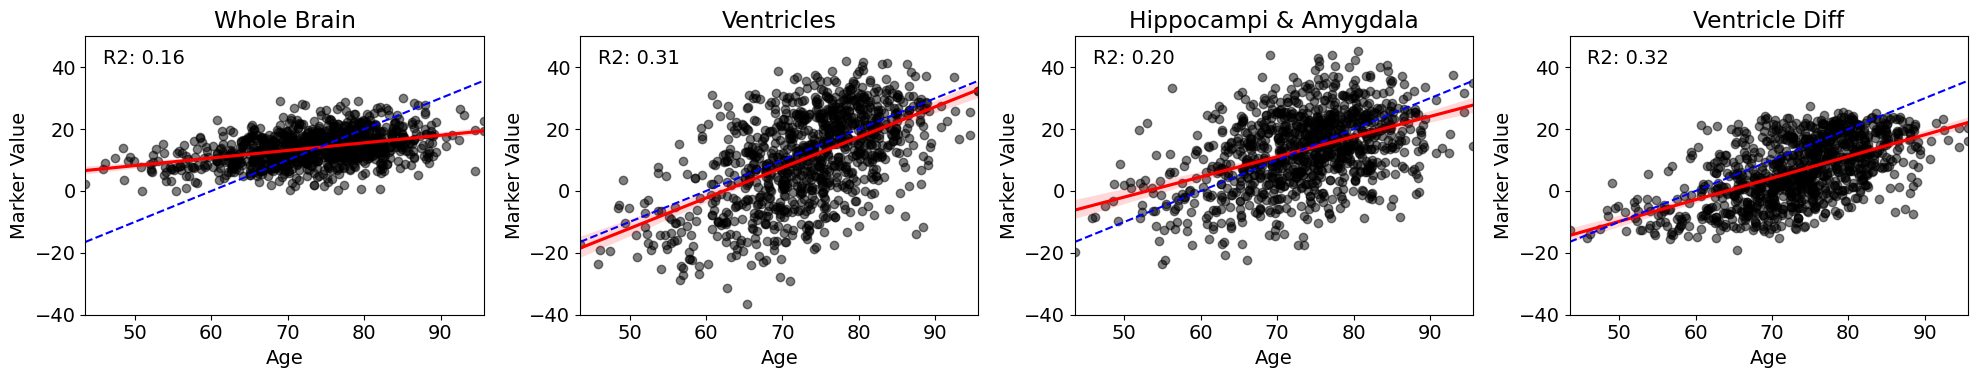

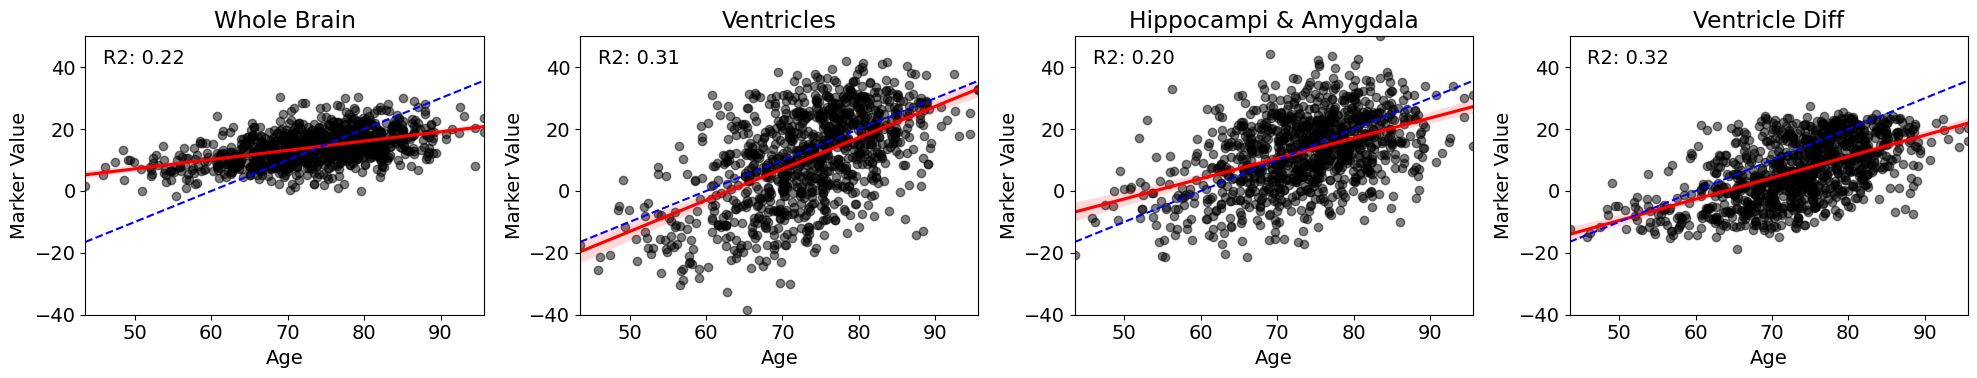

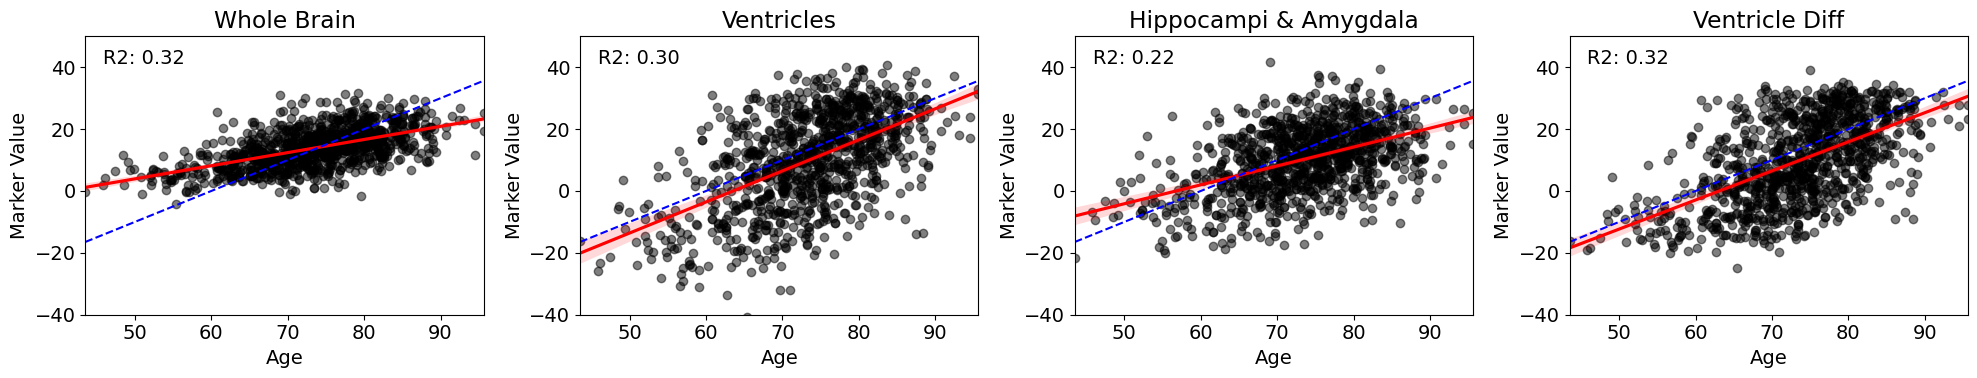

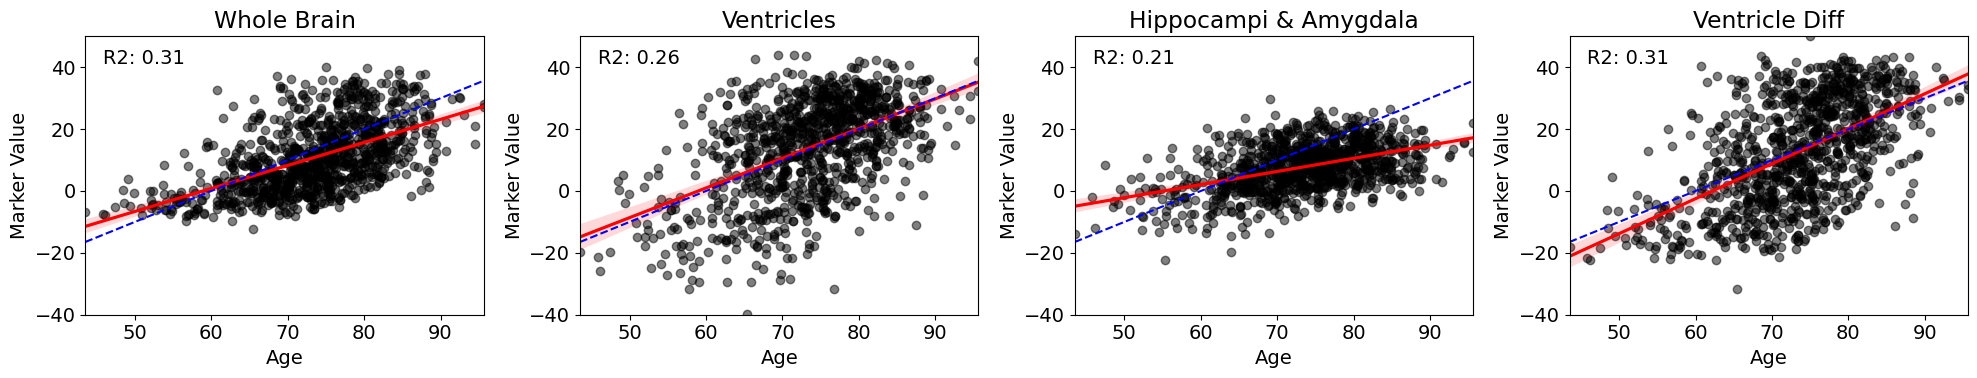

In [3]:
# 1. test biomarker-age relations
def plot_1x4_fitted_line(df, th, save_name,  ci=80):
    plt.rcParams.update({'font.size': 14})

    # Define the line equation
    line_eq = lambda x: x - 60

    # Plot the data points and the linear line
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

    # Iterate over each subplot
    plot_titles = ["Whole Brain", "Ventricles", "Hippocampi & Amygdala", "Ventricle Diff"]
    for i, ax in enumerate(axs):
        # Get the column name based on the subplot index
        column_name = f'wb_thc_{th}' if i == 0 else f'ven_thc_{th}' if i == 1 else f'hipp_thc_{th}' if i == 2 else f'vendiff_thc_{th}'

        # Plot the data points and the linear line
        sns.regplot(x='subject_ages', y=column_name, data=df, ax=ax,
                    scatter_kws={"color": "black", "alpha": 0.5},
                    line_kws={"color": "red"},
                    ci=ci)

        # Add the line with the equation y = x - 60
        x_vals = np.array(ax.get_xlim())
        ax.plot(x_vals, line_eq(x_vals), linestyle='dashed', color='blue')

        # Calculate R2 value
        x = df['subject_ages']
        y = df[column_name]
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        r_squared = r_value ** 2

        # Set the title and axis labels for the current subplot
        ax.set_title(plot_titles[i])
        ax.set_ylabel('Marker Value')
        ax.set_xlabel('Age')
        ax.set_ylim([-40, 50])

        # Add the R2 value to the legend
        legend_text = f"R2: {r_squared:.2f}"
        
        # Add the R-squared value to the plot
        ax.text(0.25, 0.9, f"R2: {r_squared:.2f}", transform=ax.transAxes, ha='right')

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'./outputs/{save_name}.png', bbox_inches='tight')

    # Show the plot
    plt.show()

datasets = pd.read_csv(csv_path)
for th in ['0','0.5','0.8','0.99']:
    plot_1x4_fitted_line(datasets, th, f'HC_marker_fittedline_at{th}',  ci=99)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

CN vs. AD: t-test independent samples, P_val:6.567e-60 t=-1.747e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 0.5: t-test independent samples with Bonferroni correction, P_val:1.000e+00 t=1.152e+00
0.5 vs. 1.0: t-test independent samples with Bonferroni correction, P_val:1.000e+00 t=-4.005e-01
1.0 vs. 2.0: t-test independent samples with Bonferroni correction, P_val:1.000e+00 t=6.830e-01
0.0 vs. 1.0: t-test independent samples with Bonferroni correction, P_val:1.000e+00 t=4.070e-01
0.5 vs. 2.0: t-test independent samples with Bonferroni correction, P_val:1.000e+00 t=6.474e-01
0.0 vs. 2.0: t-test independent samples with Bonferroni correction, P_val:1.000e+00 t=8.7

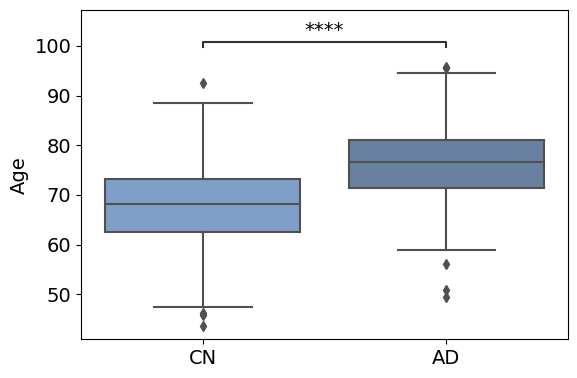

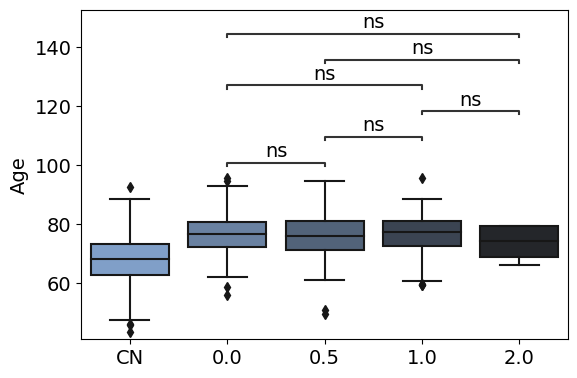

In [17]:
# 2. test age dist
def plot_age_dist_CN_vs_AD(df, save_name):
    from statannotations.Annotator import Annotator
    df['disease_categroy'] = df['disease_condition'].apply(lambda x: 'CN' if x == 0 else 'AD')    
    plt.rcParams.update({'font.size': 14})
    subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=6)
    
    # Decide which pairs of data to annotate
    plotting_parameters = {
    'data':    df,
    'x':       'disease_categroy',
    'y':       'subject_ages',
    'palette': subcat_palette[1:],
    'order':   ['CN', 'AD']
    }
    
    pairs = [('CN', 'AD')] 
 
    # Create new plot
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

    # Plot with seaborn
    sns.boxplot(**plotting_parameters)

    # Add annotations
    annotator = Annotator(axs, pairs, **plotting_parameters)
    annotator.configure(test='t-test_ind', verbose=True).apply_and_annotate()

    # Label and show
    axs.set_ylabel('Age')
    axs.set_xlabel('')
    
    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'./outputs/{save_name}.png', bbox_inches='tight')

    # Show the plot
    plt.show
    
def plot_age_dist_AD_CDR(df, save_name):
    import statsmodels
    from statannotations.Annotator import Annotator
    df['disease_categroy'] = np.where((df.disease_condition == 0), 'CN', df.scan_cdr)
    
    plt.rcParams.update({'font.size': 14})
    subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=6)
    
    # Decide which pairs of data to annotate
    plotting_parameters = {
    'data':    df,
    'x':       'disease_categroy',
    'y':       'subject_ages',
    'palette': subcat_palette[1:],
    'order':   ['CN', "0.0", "0.5", "1.0", "2.0"]
    }
    
    pairs = [('0.0', '0.5'),
             ('0.0', '1.0'),
             ('0.0', '2.0'),
             ('0.5', '1.0'),
             ('0.5', '2.0'),
             ('1.0', '2.0'),
            ] 
 
    # Create new plot
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

    # Plot with seaborn
    sns.boxplot(**plotting_parameters)

    # Add annotations
    annotator = Annotator(axs, pairs, **plotting_parameters)
    annotator.configure(test='t-test_ind', comparisons_correction="bonferroni", verbose=True).apply_and_annotate()

    # Label and show
    axs.set_ylabel('Age')
    axs.set_xlabel('')
    
    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'./outputs/{save_name}.png', bbox_inches='tight')

    # Show the plot
    plt.show  
    
datasets = pd.read_csv(csv_path)
plot_age_dist_CN_vs_AD(datasets, 'Age_distributions_CN_vs_AD')
plot_age_dist_AD_CDR(datasets, 'Age_distributions_CN_vs_ADcohorts')

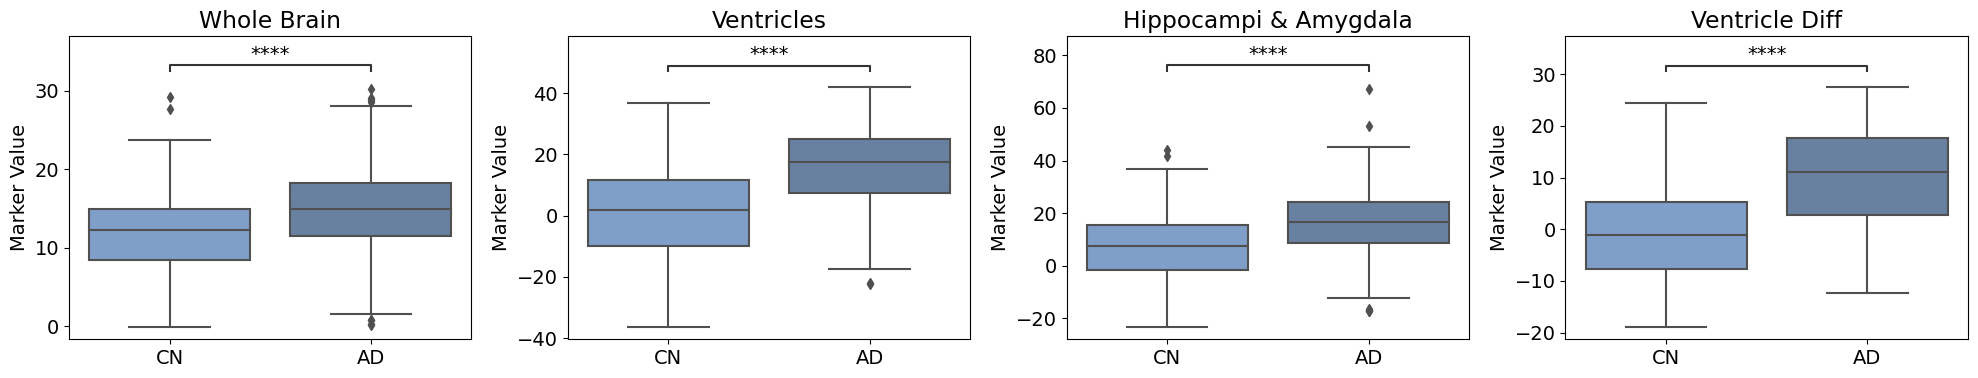

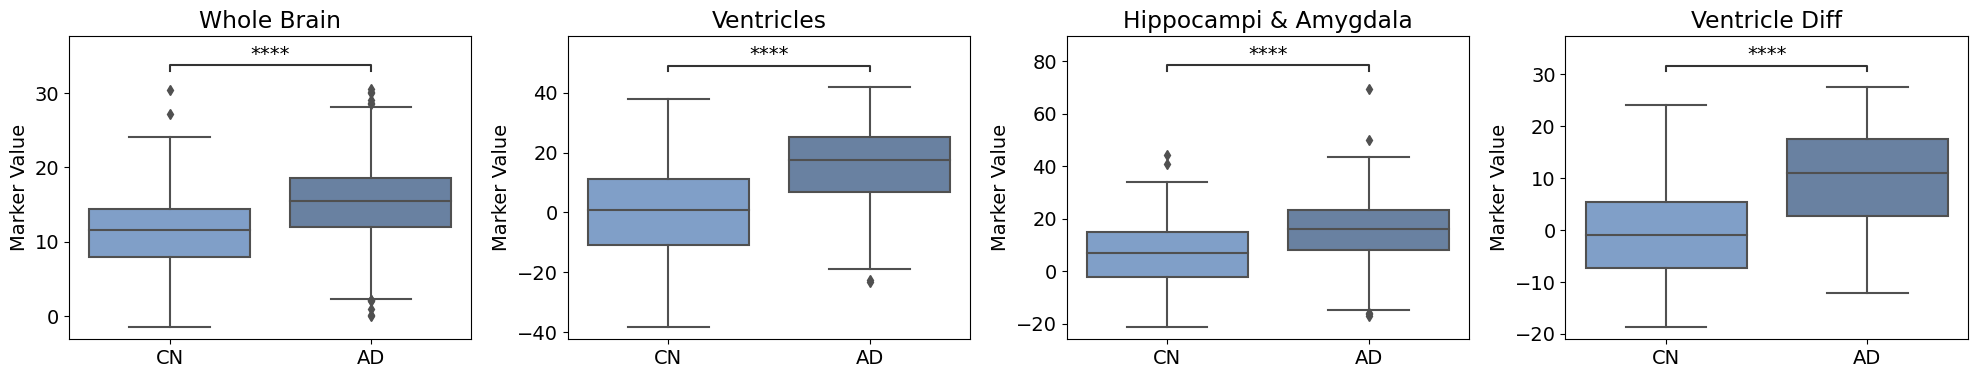

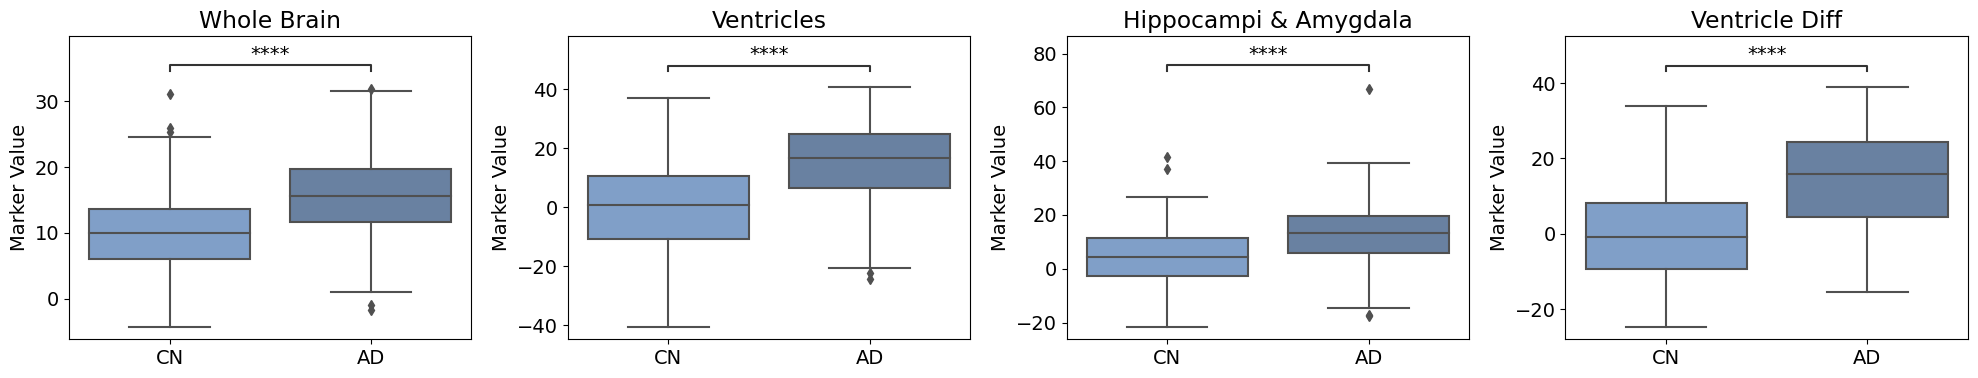

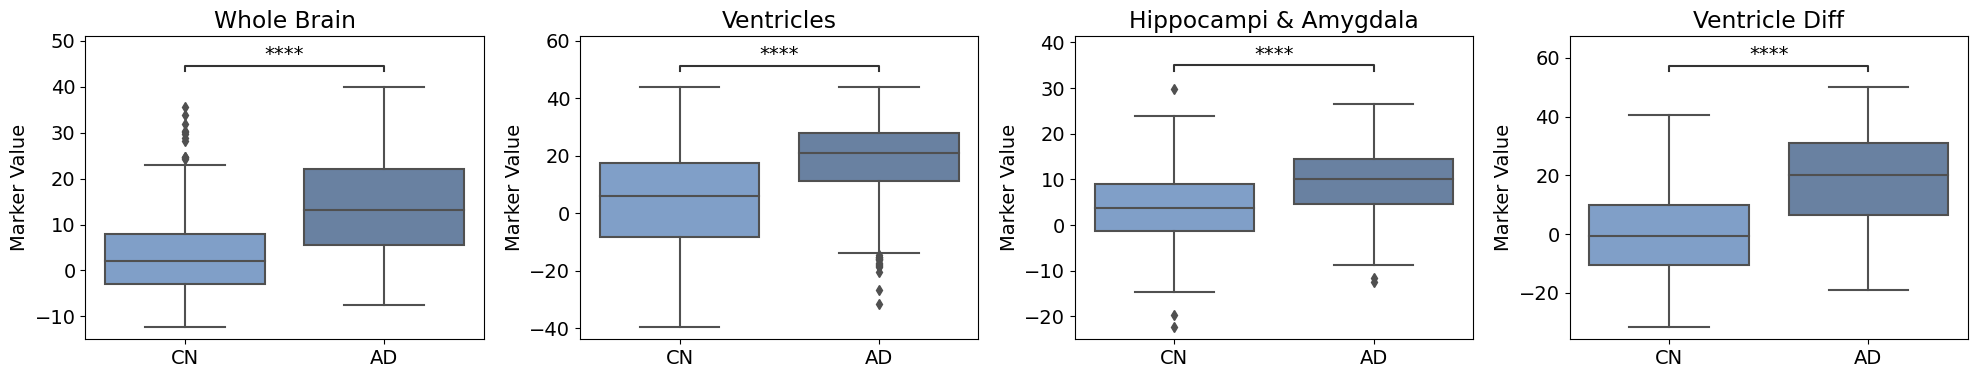

In [24]:
# 3.1. compare CN with AD using biomarker
def plot_1x4_CN_vs_AD(df, th, save_name):
    import statsmodels
    from statannotations.Annotator import Annotator
    df['disease_categroy'] = np.where((df.disease_condition == 0), 'CN', 'AD')
    
    plt.rcParams.update({'font.size': 14})
    subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=6)
    
    # Decide which pairs of data to annotate
    plotting_parameters = {
    'data':    df,
    'x':       'disease_categroy',
    'palette': subcat_palette[1:],
    'order':   ['CN', "AD"]
    }
    
    pairs = [('CN', 'AD')] 
 
    # Plot the data points and the linear line
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

    # Iterate over each subplot
    plot_titles = ["Whole Brain", "Ventricles", "Hippocampi & Amygdala", "Ventricle Diff"]
    for i, ax in enumerate(axs):
        # Get the column name based on the subplot index
        column_name = f'wb_thc_{th}' if i == 0 else f'ven_thc_{th}' if i == 1 else f'hipp_thc_{th}' if i == 2 else f'vendiff_thc_{th}'

        # Plot with seaborn
        sns.boxplot(y=column_name, **plotting_parameters, ax=ax)

        # Add annotations
        annotator = Annotator(ax, pairs, y=column_name, **plotting_parameters)
        annotator.configure(test='t-test_ind', comparisons_correction="bonferroni", verbose=False).apply_and_annotate()


        # Set the title and axis labels for the current subplot
        ax.set_title(plot_titles[i])
        ax.set_ylabel('Marker Value')
        ax.set_xlabel('')
        
    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'./outputs/{save_name}.png', bbox_inches='tight')

    # Show the plot
    plt.show()
    
datasets = pd.read_csv(csv_path)
for th in ['0','0.5','0.8','0.99']:
    plot_1x4_CN_vs_AD(datasets, th, f'CNAD_marker_at{th}')

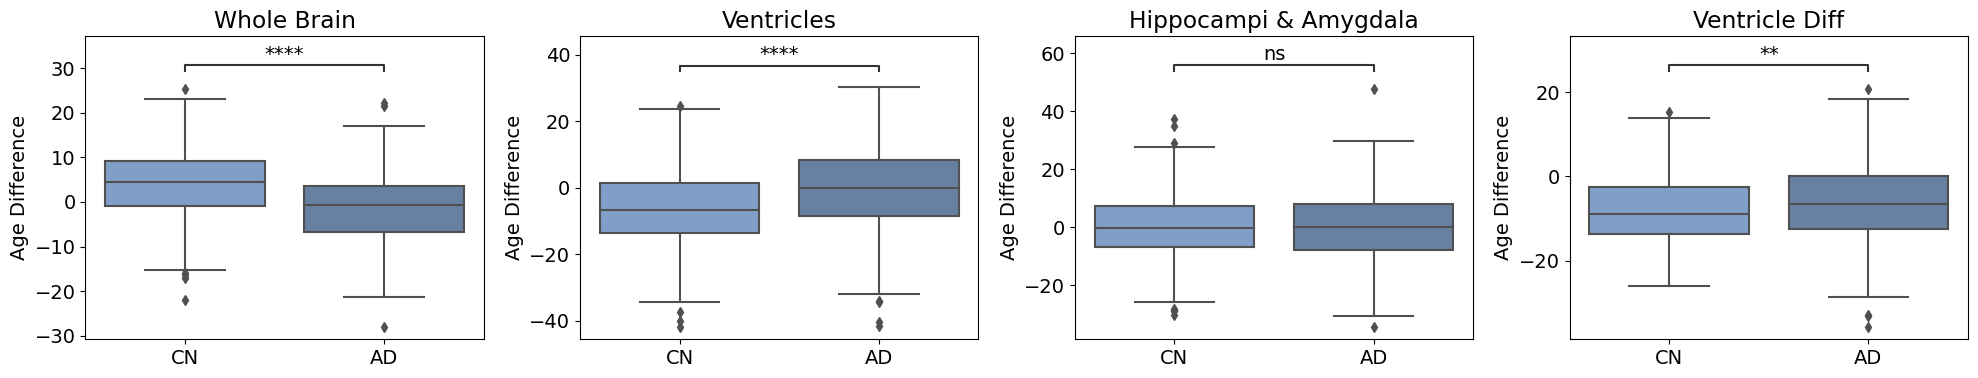

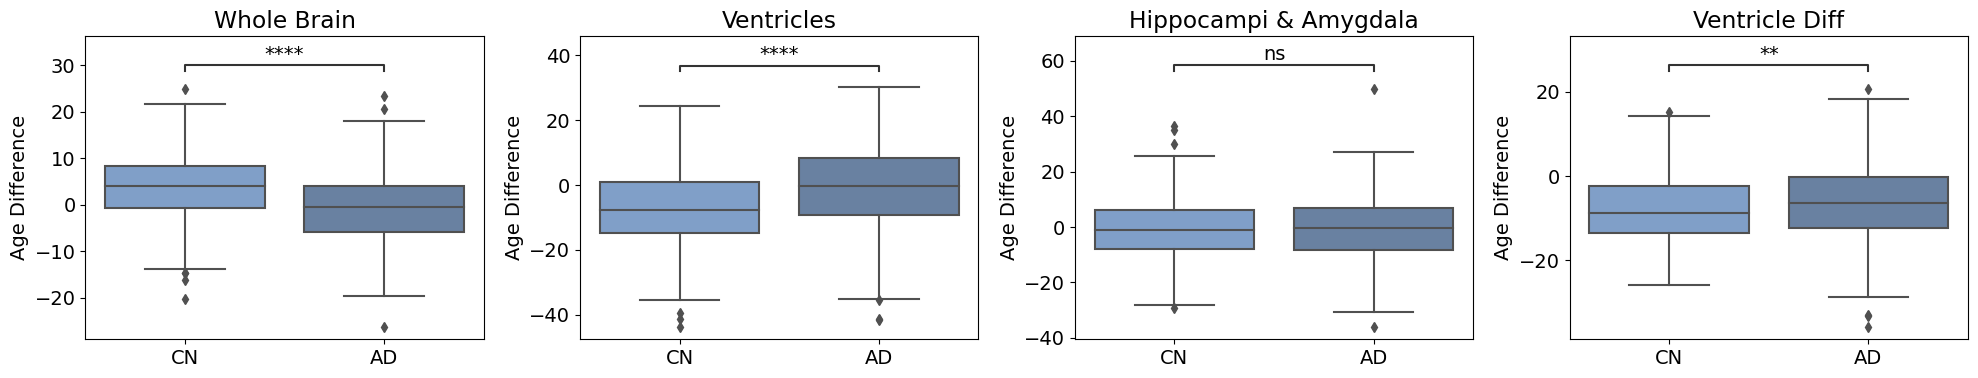

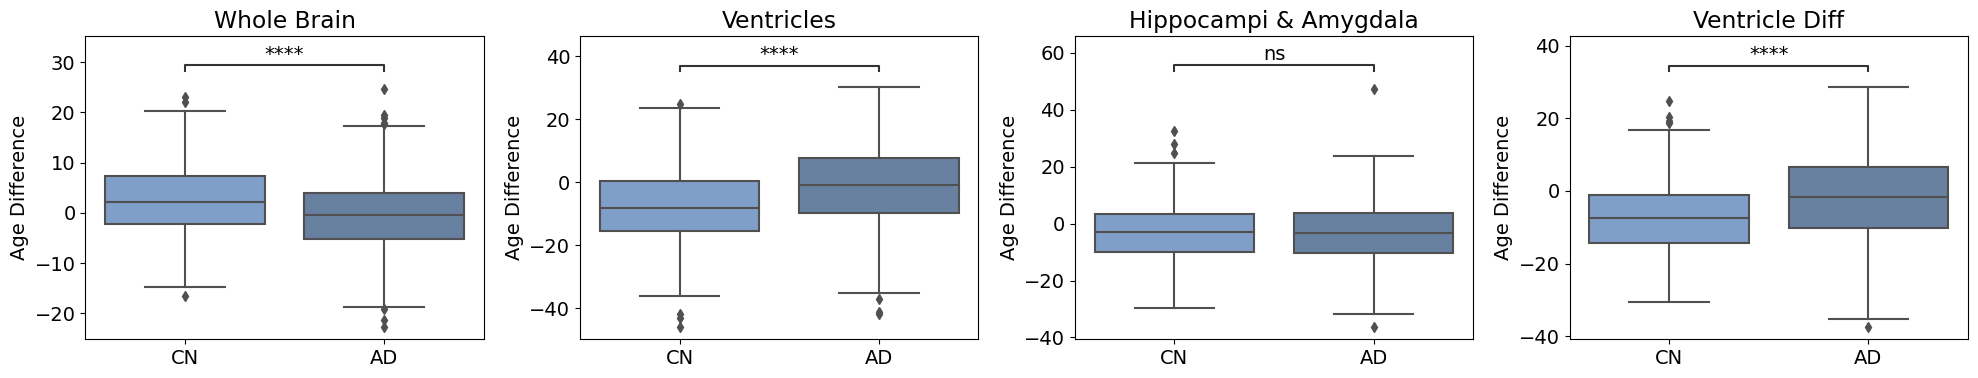

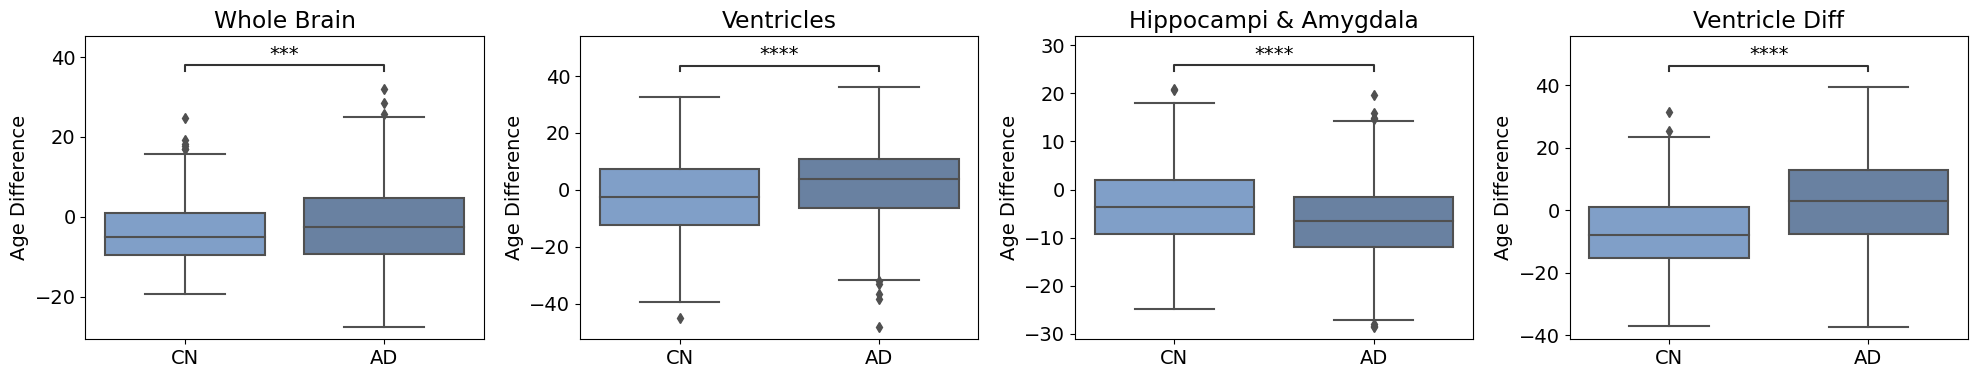

In [25]:
# 3.2. compare CN with AD using age diff 
def plot_1x4_CN_vs_AD_age_diff(df, th, save_name):
    import statsmodels
    from statannotations.Annotator import Annotator
    df['disease_categroy'] = np.where((df.disease_condition == 0), 'CN', 'AD')
    df[f'wb_thc_{th}_diff']= df[f'wb_thc_{th}'] - df['subject_ages'] + 60
    df[f'ven_thc_{th}_diff']= df[f'ven_thc_{th}'] - df['subject_ages'] + 60
    df[f'hipp_thc_{th}_diff']= df[f'hipp_thc_{th}'] - df['subject_ages'] + 60
    df[f'vendiff_thc_{th}_diff']= df[f'vendiff_thc_{th}'] - df['subject_ages'] + 60
    
    plt.rcParams.update({'font.size': 14})
    subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=6)
    
    # Decide which pairs of data to annotate
    plotting_parameters = {
    'data':    df,
    'x':       'disease_categroy',
    'palette': subcat_palette[1:],
    'order':   ['CN', "AD"]
    }
    
    pairs = [('CN', 'AD')] 
 
    # Plot the data points and the linear line
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

    # Iterate over each subplot
    plot_titles = ["Whole Brain", "Ventricles", "Hippocampi & Amygdala", "Ventricle Diff"]
    for i, ax in enumerate(axs):
        # Get the column name based on the subplot index
        column_name = f'wb_thc_{th}_diff' if i == 0 else f'ven_thc_{th}_diff' if i == 1 else f'hipp_thc_{th}_diff' if i == 2 else f'vendiff_thc_{th}_diff'

        # Plot with seaborn
        sns.boxplot(y=column_name, **plotting_parameters, ax=ax)

        # Add annotations
        annotator = Annotator(ax, pairs, y=column_name, **plotting_parameters)
        annotator.configure(test='t-test_ind', comparisons_correction="bonferroni", verbose=False).apply_and_annotate()


        # Set the title and axis labels for the current subplot
        ax.set_title(plot_titles[i])
        ax.set_ylabel('Age Difference')
        ax.set_xlabel('')
        
    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'./outputs/{save_name}.png', bbox_inches='tight')

    # Show the plot
    plt.show()
    
datasets = pd.read_csv(csv_path)
for th in ['0','0.5','0.8','0.99']:
    plot_1x4_CN_vs_AD_age_diff(datasets, th, f'CNAD_age_diff_at{th}')

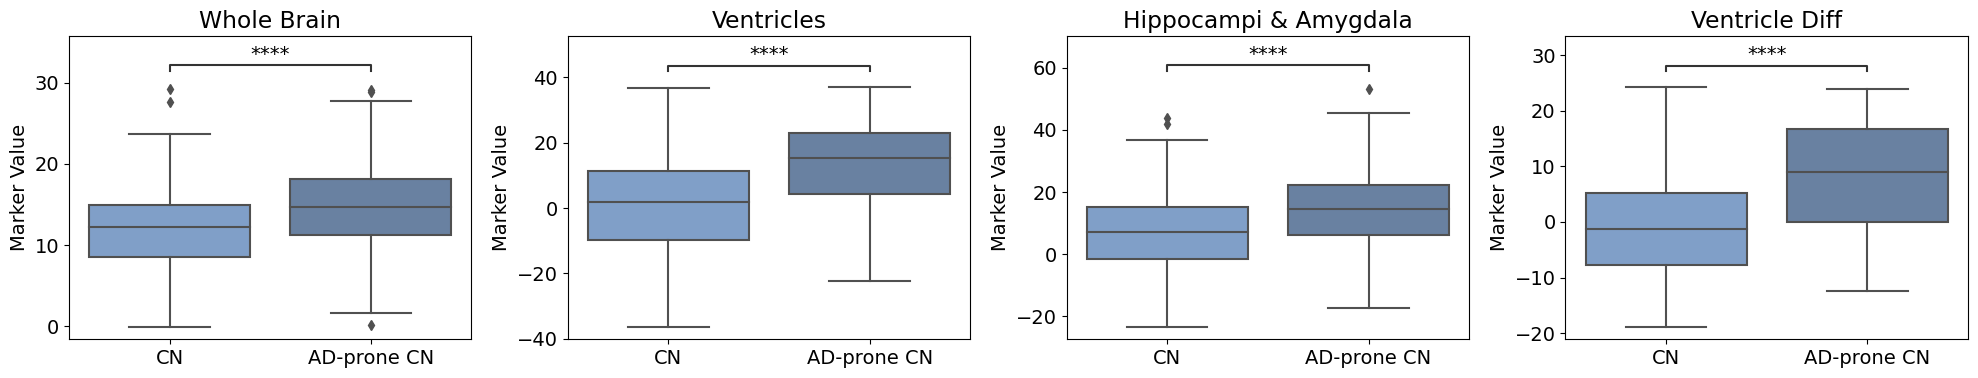

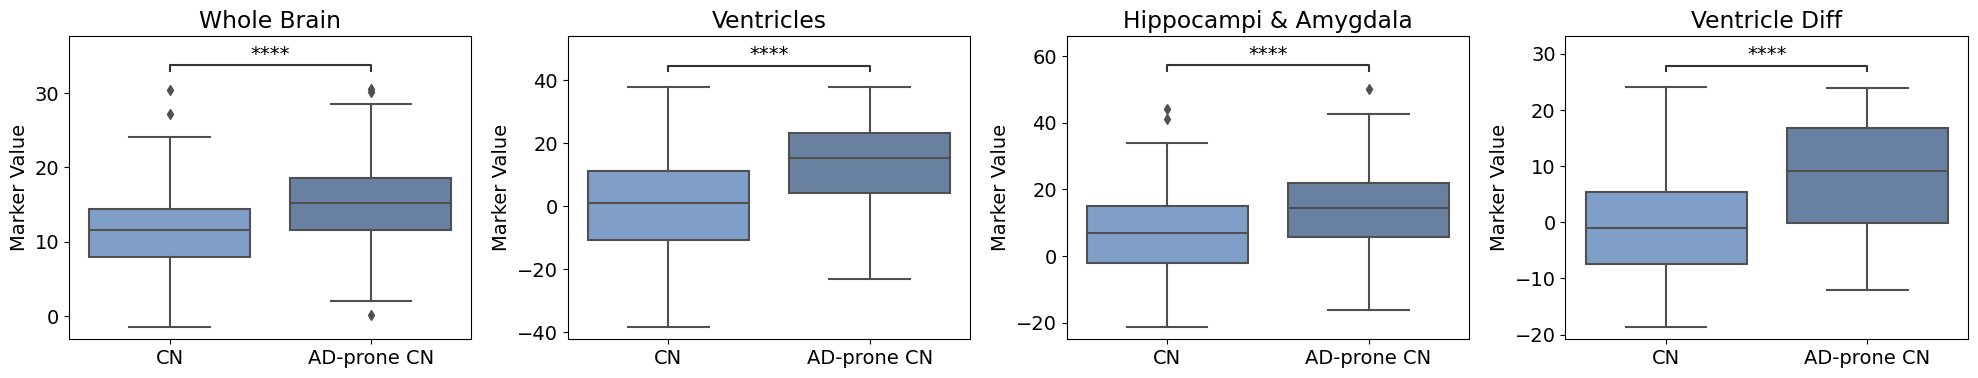

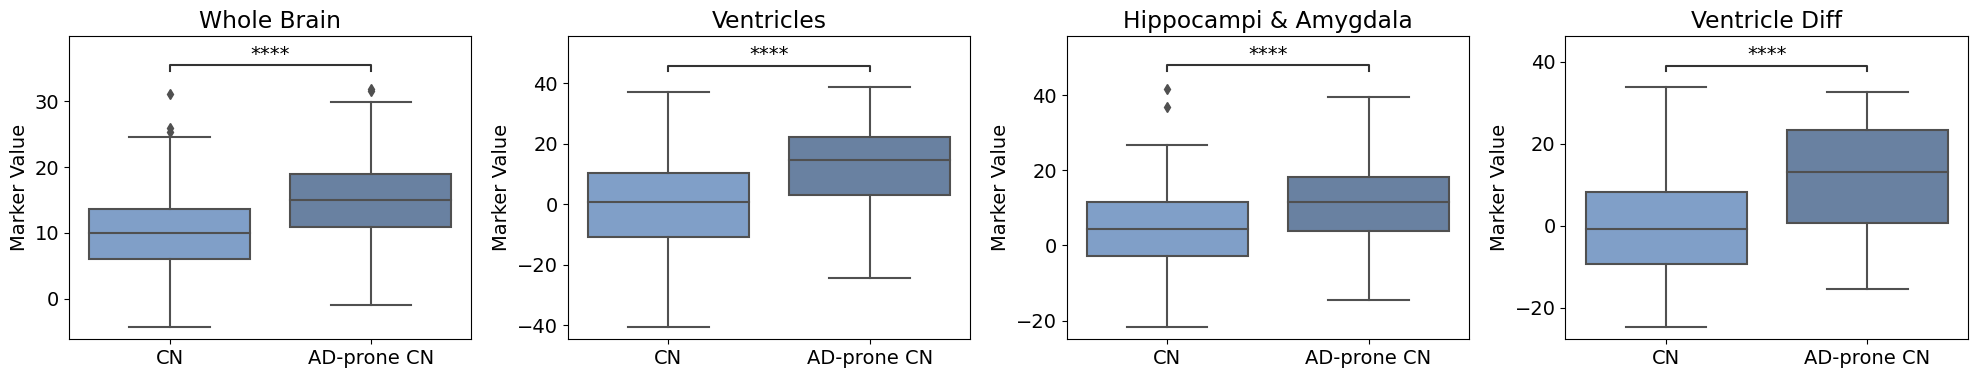

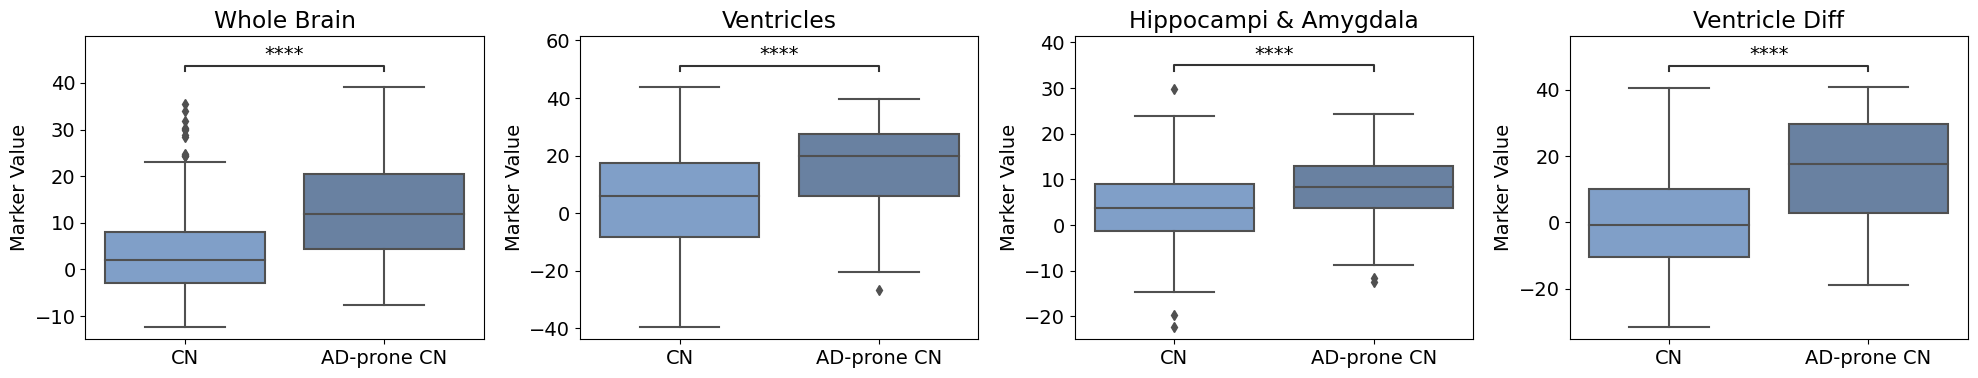

In [26]:
# 4.1. compare CN with AD-prone CN using biomarker
def plot_1x4_CN_vs_ADprone_CN(df, th, save_name):
    import statsmodels
    from statannotations.Annotator import Annotator
    
    df = df.drop(df[(df.disease_condition == 1) & (df.scan_cdr != 0)].index)
    df['disease_categroy'] = np.where((df.disease_condition == 0), 'CN', 'AD-prone CN')
    
    plt.rcParams.update({'font.size': 14})
    subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=6)
    
    # Decide which pairs of data to annotate
    plotting_parameters = {
    'data':    df,
    'x':       'disease_categroy',
    'palette': subcat_palette[1:],
    'order':   ['CN', "AD-prone CN"]
    }
    
    pairs = [('CN', 'AD-prone CN')] 
 
    # Plot the data points and the linear line
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

    # Iterate over each subplot
    plot_titles = ["Whole Brain", "Ventricles", "Hippocampi & Amygdala", "Ventricle Diff"]
    for i, ax in enumerate(axs):
        # Get the column name based on the subplot index
        column_name = f'wb_thc_{th}' if i == 0 else f'ven_thc_{th}' if i == 1 else f'hipp_thc_{th}' if i == 2 else f'vendiff_thc_{th}'

        # Plot with seaborn
        sns.boxplot(y=column_name, **plotting_parameters, ax=ax)

        # Add annotations
        annotator = Annotator(ax, pairs, y=column_name, **plotting_parameters)
        annotator.configure(test='t-test_ind', comparisons_correction="bonferroni", verbose=False).apply_and_annotate()


        # Set the title and axis labels for the current subplot
        ax.set_title(plot_titles[i])
        ax.set_ylabel('Marker Value')
        ax.set_xlabel('')
        
    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'./outputs/{save_name}.png', bbox_inches='tight')

    # Show the plot
    plt.show()
    
datasets = pd.read_csv(csv_path)
for th in ['0','0.5','0.8','0.99']:
    plot_1x4_CN_vs_ADprone_CN(datasets, th, f'CN_ADproneCN__marker_at{th}')

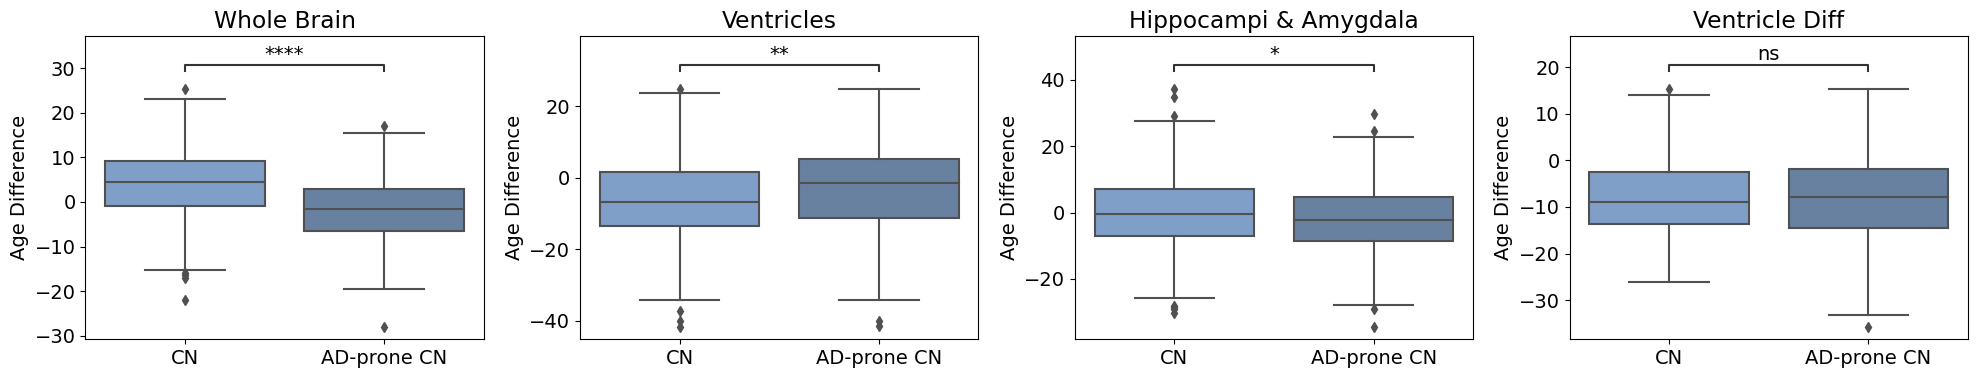

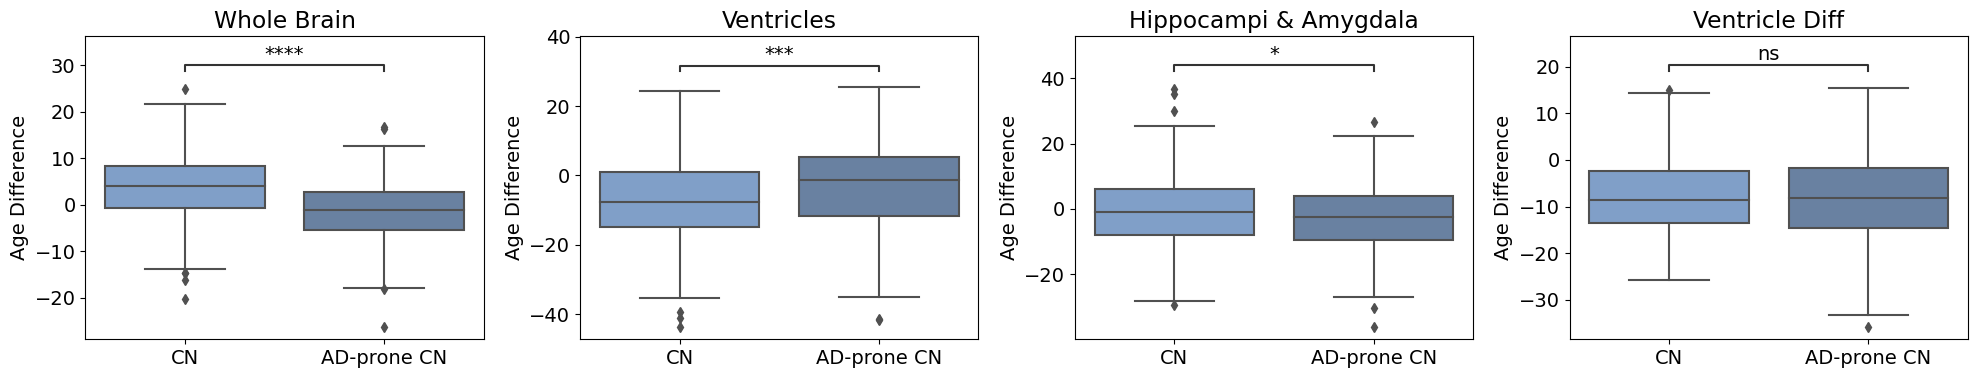

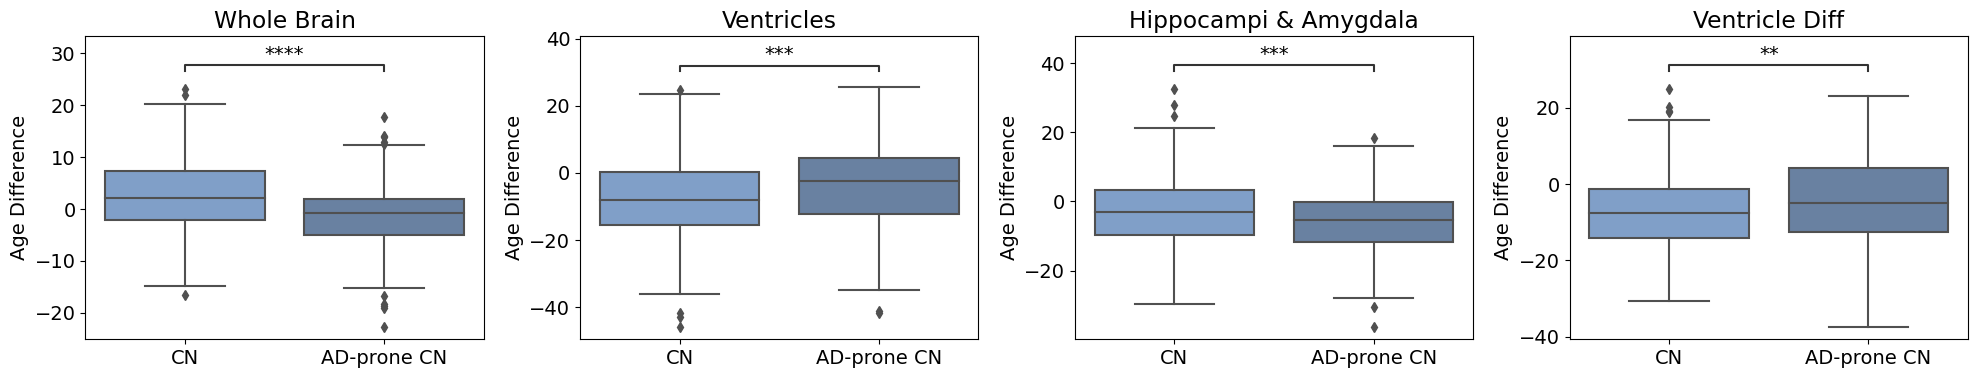

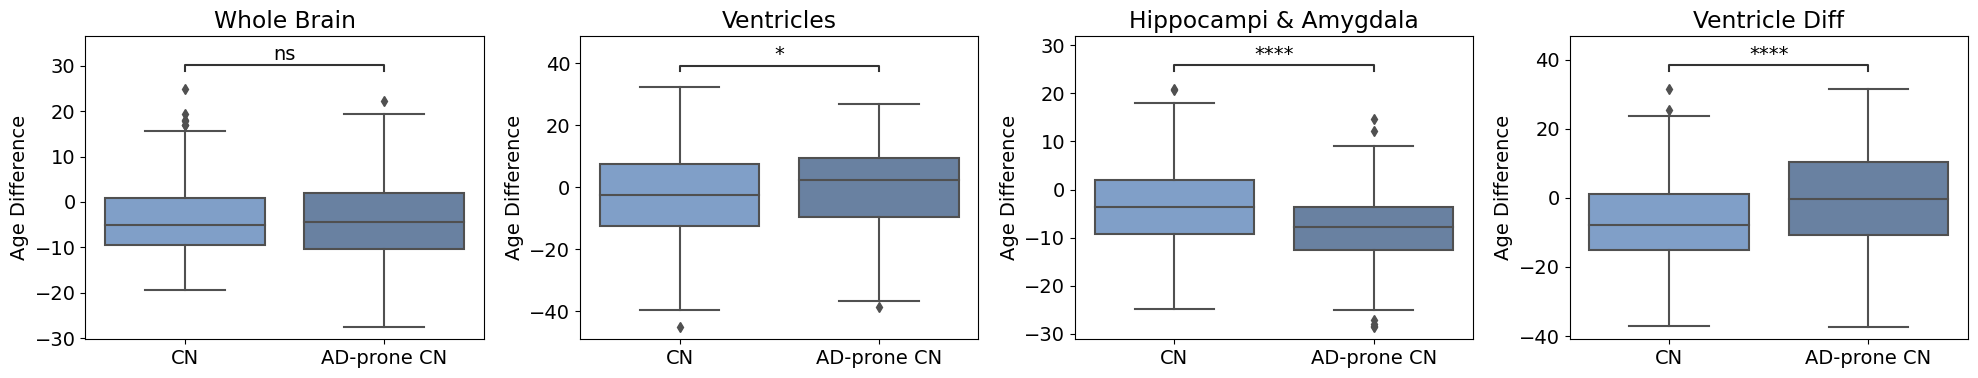

In [28]:
# 4.2. compare CN with with AD-prone CN using age diff 
def plot_1x4_CN_vs_AD_age_diff(df, th, save_name):
    import statsmodels
    from statannotations.Annotator import Annotator
    df = df.drop(df[(df.disease_condition == 1) & (df.scan_cdr != 0)].index)
    df['disease_categroy'] = np.where((df.disease_condition == 0), 'CN', 'AD-prone CN')
    df[f'wb_thc_{th}_diff']= df[f'wb_thc_{th}'] - df['subject_ages'] + 60
    df[f'ven_thc_{th}_diff']= df[f'ven_thc_{th}'] - df['subject_ages'] + 60
    df[f'hipp_thc_{th}_diff']= df[f'hipp_thc_{th}'] - df['subject_ages'] + 60
    df[f'vendiff_thc_{th}_diff']= df[f'vendiff_thc_{th}'] - df['subject_ages'] + 60
    
    plt.rcParams.update({'font.size': 14})
    subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=6)
    
    # Decide which pairs of data to annotate
    plotting_parameters = {
    'data':    df,
    'x':       'disease_categroy',
    'palette': subcat_palette[1:],
    'order':   ['CN', "AD-prone CN"]
    }
    
    pairs = [('CN', 'AD-prone CN')] 
 
    # Plot the data points and the linear line
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

    # Iterate over each subplot
    plot_titles = ["Whole Brain", "Ventricles", "Hippocampi & Amygdala", "Ventricle Diff"]
    for i, ax in enumerate(axs):
        # Get the column name based on the subplot index
        column_name = f'wb_thc_{th}_diff' if i == 0 else f'ven_thc_{th}_diff' if i == 1 else f'hipp_thc_{th}_diff' if i == 2 else f'vendiff_thc_{th}_diff'

        # Plot with seaborn
        sns.boxplot(y=column_name, **plotting_parameters, ax=ax)

        # Add annotations
        annotator = Annotator(ax, pairs, y=column_name, **plotting_parameters)
        annotator.configure(test='t-test_ind', comparisons_correction="bonferroni", verbose=False).apply_and_annotate()


        # Set the title and axis labels for the current subplot
        ax.set_title(plot_titles[i])
        ax.set_ylabel('Age Difference')
        ax.set_xlabel('')
        
    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'./outputs/{save_name}.png', bbox_inches='tight')

    # Show the plot
    plt.show()
    
datasets = pd.read_csv(csv_path)
for th in ['0','0.5','0.8','0.99']:
    plot_1x4_CN_vs_AD_age_diff(datasets, th, f'CN_ADproneCN__age_diff_at{th}')

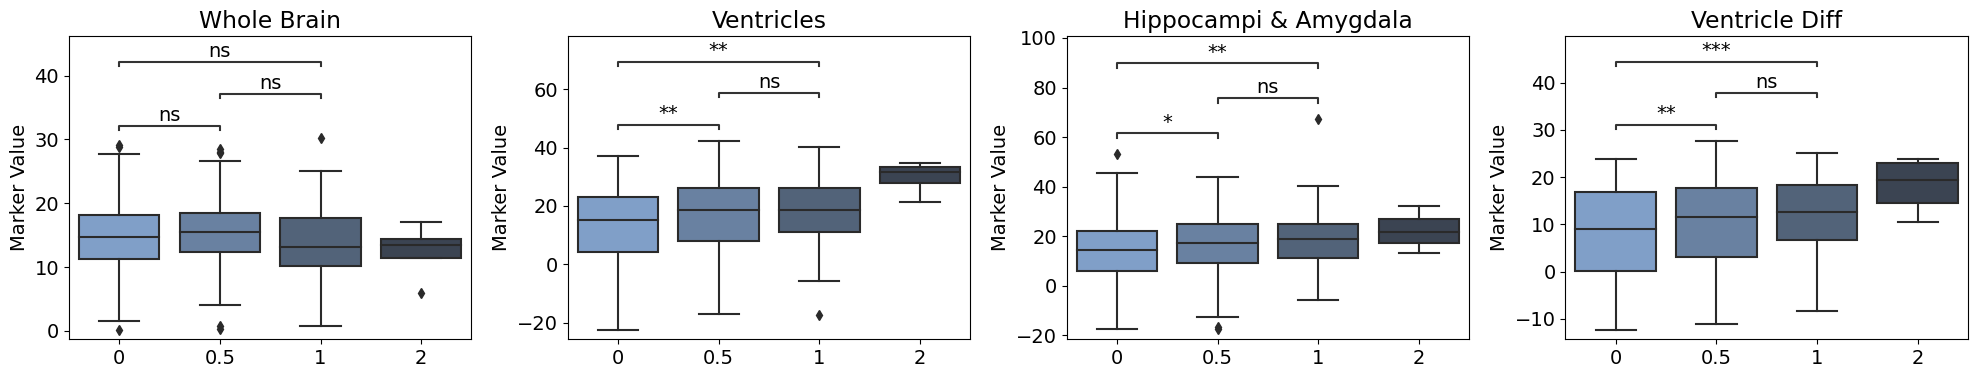

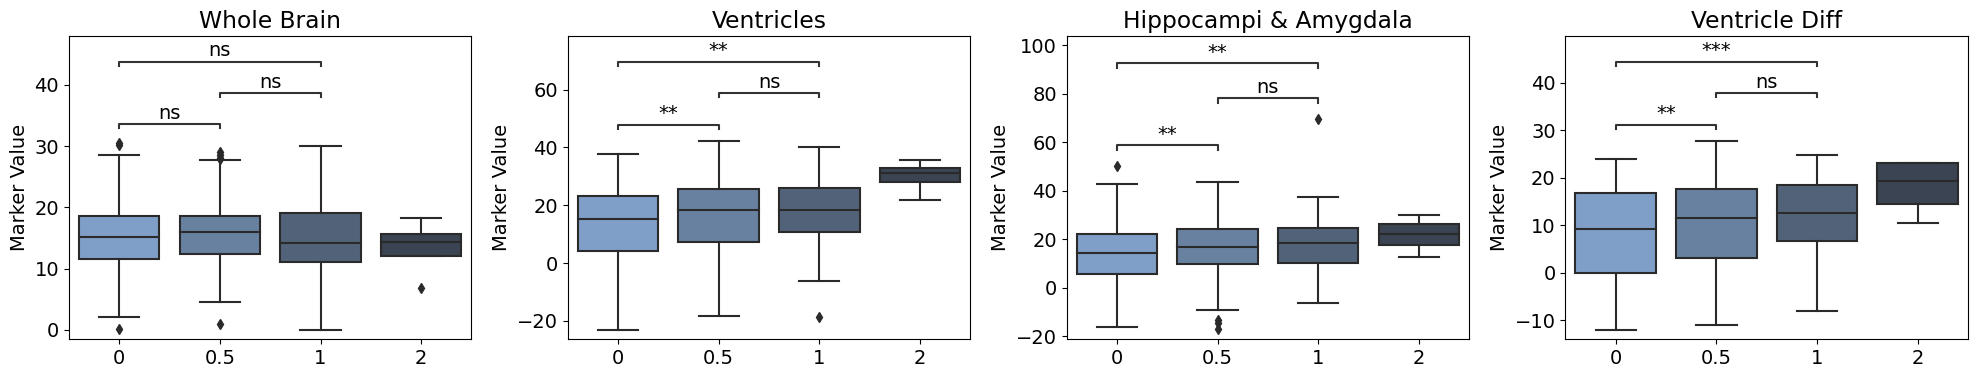

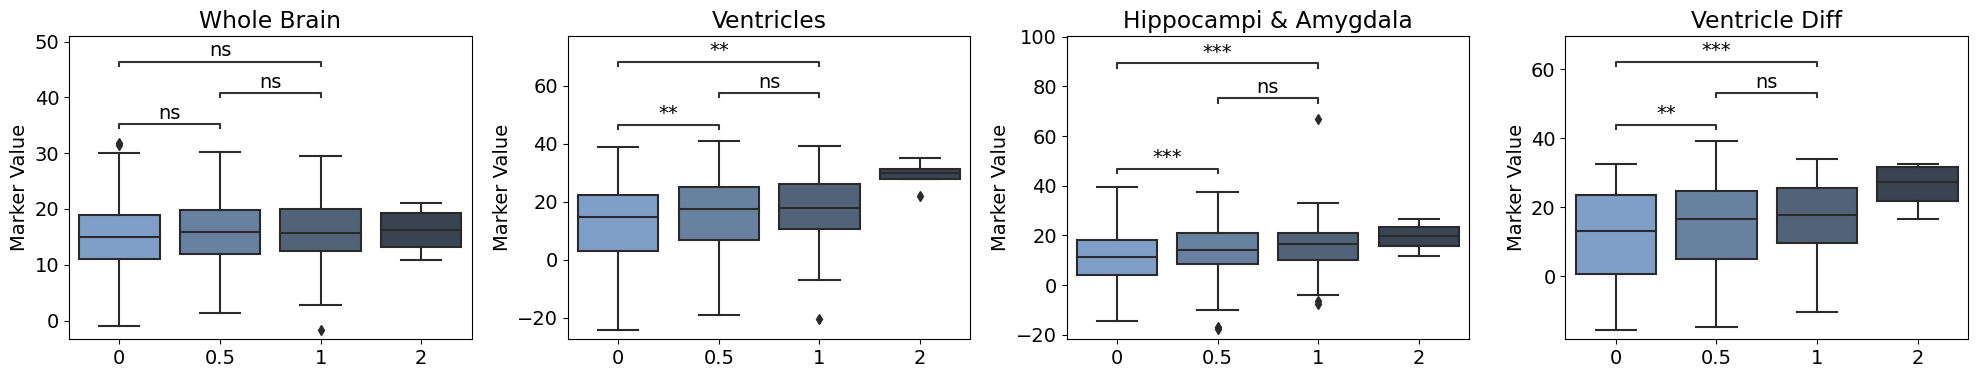

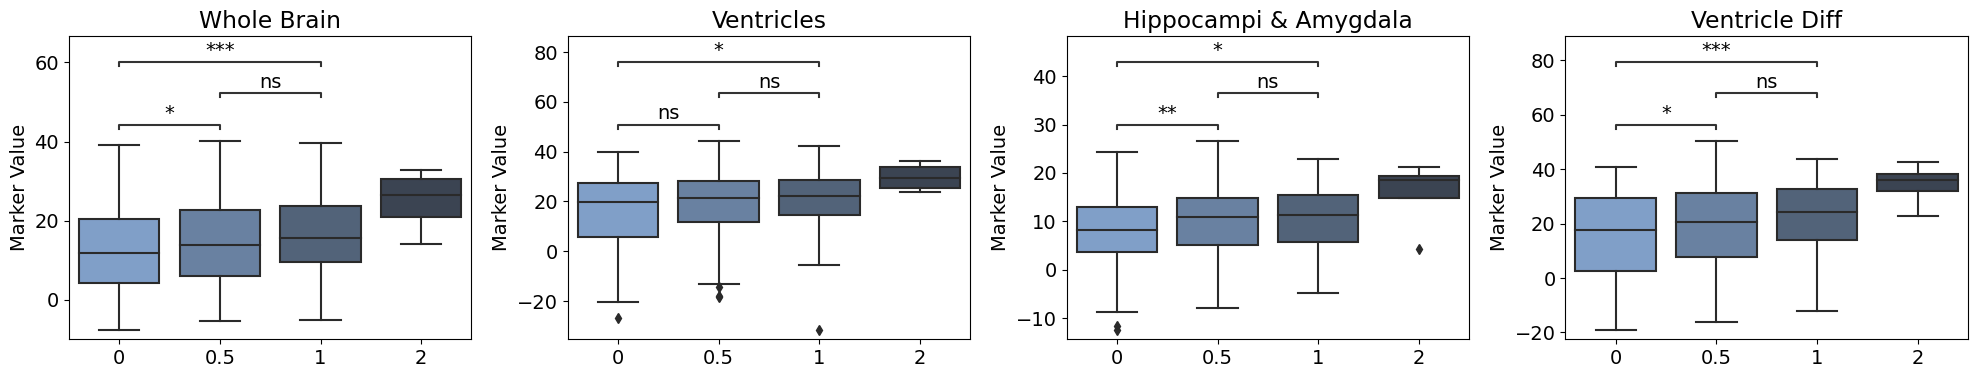

In [37]:
# 5. compare AD stages according to CDR using biomarker
def plot_age_dist_AD_CDR(df, th, save_name):
    import statsmodels
    from statannotations.Annotator import Annotator

    plt.rcParams.update({'font.size': 14})
    subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=6)
    
#     df['disease_categroy'] = np.where((df.disease_condition == 0), 'CN', df.scan_cdr)
#     # Decide which pairs of data to annotate
#     plotting_parameters = {
#     'data':    df,
#     'x':       'disease_categroy',
#     'palette': subcat_palette[1:],
#     'order':   ['CN', "0.0", "0.5", "1.0", "2.0"]
#     }
    
#     pairs = [('0.0', '0.5'),
#              ('0.0', '1.0'),
#              ('0.5', '1.0'),
#             ] 

    df = df.drop(df[df.disease_condition == 0].index)
    
    # Decide which pairs of data to annotate
    plotting_parameters = {
    'data':    df,
    'x':       'scan_cdr',
    'palette': subcat_palette[1:],
    'order':   [0, 0.5, 1, 2]
    }
    
    pairs = [(0, 0.5),
             (0, 1),
             (0.5, 1),
            ] 

    # Plot the data points and the linear line
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

    # Iterate over each subplot
    plot_titles = ["Whole Brain", "Ventricles", "Hippocampi & Amygdala", "Ventricle Diff"]
    for i, ax in enumerate(axs):
        # Get the column name based on the subplot index
        column_name = f'wb_thc_{th}' if i == 0 else f'ven_thc_{th}' if i == 1 else f'hipp_thc_{th}' if i == 2 else f'vendiff_thc_{th}'

        # Plot with seaborn
        sns.boxplot(y=column_name, **plotting_parameters, ax=ax)

        # Add annotations
        annotator = Annotator(ax, pairs, y=column_name, **plotting_parameters)
        annotator.configure(test='t-test_ind', comparisons_correction="bonferroni", verbose=False).apply_and_annotate()


        # Set the title and axis labels for the current subplot
        ax.set_title(plot_titles[i])
        ax.set_ylabel('Marker Value')
        ax.set_xlabel('')
        
    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'./outputs/{save_name}.png', bbox_inches='tight')

    # Show the plot
    plt.show()
    
datasets = pd.read_csv(csv_path)
for th in ['0','0.5','0.8','0.99']:
    plot_age_dist_AD_CDR(datasets, th, f'AD_markers_at{th}')